# PlantGrowth R dataset

## Index
1) Introduction  
   1.1 Project context  
   1.2 Analysis objectives  
   1.3 Description of the PlantGrowth dataset  
2) Libraries used in the analysis of the project 
3) What is the t statistic and ANOVA and what is it used for?  
   3.1 t statistic  
   3.2 ANOVA  
   3.3 Similarities and differences  
3) Dataset Loading and Exploration
4) Data analysis  
   4.1 Formulation of the hypothesis
   4.2 Perform a t-test  
   4.3 Perform ANOVA 
   4.4 ANOVA vs several t-test
5) Conclusions  
6) References

## 1. Introduction

### 1.1 Project context

This fictional database about plants is a pre-loaded example dataset in R and is part of a collection of 2337 datasets which were originally distributed alongside the statistical software environment R and some of its add-on packages.  
The goal is to make these data more broadly accessible for teaching and statistical software development.  

### 1.2 Analysis objectives  

The dataset will be used to perform statistical analyzes to determine if the treatments have a significant effect on plant growth compared to a control group.  
The steps to be carried out are the following:  
1. Download the database and upload it to the IDE  
2. Describe the data set  
3. Describe what a t-test is, how it works, and what the assumptions are  
4. Perform a t-test to determine whether there is a significant difference between the two treatment groups trt1 and trt2.  
5. Perform ANOVA to determine whether there is a significant difference between the three treatment groups ctrl, trt1, and trt2.  
6. Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.  

### 1.3 Description of the PlantGrowth dataset  

This fictitious database is part of the base R package (datasets) and contains the results of an experiment that measures the weight of plants after applying different treatments.  


A brief description of this database can be found on the official website [1], summarized in the following table:  

| Package  | Item        | Title                                     | CSV  | Doc  | Rows | Cols | n_binary | n_character | n_factor | n_logical | n_numeric |
|----------|-------------|-------------------------------------------|------|------|------|------|----------|-------------|----------|-----------|-----------|
| datasets | PlantGrowth | Results from an Experiment on Plant Growth | CSV  | Doc  | 30   | 2    | 0        | 0           | 1        | 0         | 1         |


The database is really small(referring to the amount of information it contains), and contains the following data:  

- Number of observations (rows):  30 is the sample size  
- Number of variables: 2 
    weight: A numerical variable that measures the weight of plants (in arbitrary units) after a period of growth.  
    group: A categorical variable that indicates the treatment group to which each plant belongs. It has three levels:  

            ctrl: Control group, without treatment applied.    
            trt1: First treatment group.  
            trt2: Second treatment group.  

## 2. Libraries used in the analysis of the project  




To carry out this project, the following python libraries are useful:

**Pandas**: It is one of the main libraries for the manipulation and analysis of existing data. It is used to load, process and clean the data set.  

**NumPy**: Used for numerical calculations and matrix operations, commonly used with Pandas.

**Matplotlib**: Library used for data visualization.  

**SciPy**: Contains statistical tools that allow you to perform tests such as ANOVA to analyze the differences between groups.


## 3. What is the t statistic and ANOVA and what is it used for? 

### 3.1 t statistic

**The t-statistic**, which is a value that serves as a test to know if the difference between the response of two groups is statistically significant or not.  

This statistic is based on the student t distribution, which shares similarities with the normal distribution, since both are continuous, have a bell shape or their standardized mean is equal to 0, however the tails or edges of the t distribution are more coarse, due to the additional uncertainty generated by the lack of knowledge of the sample variance.  
Having already used the normal distribution, the t distribution is used for this assumption since the sample is much smaller and the population variance is unknown.  

### 3.2 ANOVA  

**ANOVA (Analysis of Variance)** is a statistical technique that is used to compare the means of three or more groups and determine if there are significant differences between them. Evaluate variability within and between groups to verify whether observed differences are due to specific factors or chance.  
It is based on the relationship between the explained variance (between groups) and the unexplained variance (within groups), expressed by a statistic called 𝐹.  
This statistic is commonly used in experiments and studies with multiple categories.

###  3.3 Similarities and differences 
Both the t statistic and ANOVA (the analysis of variance) are closely related because they both evaluate differences between group means, but they differ in how they are applied and in the scenarios for which they are designed.    


The usefulness and difference between both statistics is shown in the following table:

| **Aspect**         | **t-test**                                      | **ANOVA**                                     |
|---------------------|------------------------------------------------|-----------------------------------------------|
| **Number of groups** | Compares the means of **two groups**           | Compares the means of **three or more groups** |
| **Null hypothesis** | The means of the two groups are equal          | All group means are equal                     |
| **Statistic**       | Computes the **t** value                       | Computes the **F** value                      |
| **Purpose**         | Determine if there is a significant difference between two specific groups | Determine if at least one group is different from the others |


## 3 Dataset Loading and Exploration  

To load the data from the database, first of all i have to use the functionalities of the Pandas library, so first of all I have to import all the necessary libraries for both the data analysis and the visualization part.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as stats  

To load the database, I use the following code that uses Pandas:

In [2]:
# Using pandas to create a  dataframe and open the database
data_path = "project-db/PlantGrowth.csv"
plant_growth_data = pd.read_csv(data_path)

# Check the first rows to see how the database looks like
print(plant_growth_data.head())

   rownames  weight group
0         1    4.17  ctrl
1         2    5.58  ctrl
2         3    5.18  ctrl
3         4    6.11  ctrl
4         5    4.50  ctrl


Although previously in section 1.3 I have made a first introduction and description of the variables, using the following code you can also obtain similar information:

In [3]:
# Dataset size
print(f"Rows and columns: {plant_growth_data.shape}")

# Summary of variables
print(plant_growth_data.info())

Rows and columns: (30, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  30 non-null     int64  
 1   weight    30 non-null     float64
 2   group     30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 848.0+ bytes
None


The previous code shows us that the database is made up of 30 entries, or in other words, the sample size.
It also tells us the nature of the variables; their meaning is explained below:
- **int64**: Represents 64-bit integer data.  
- **float64**: Represents 64-bit float data.  
- **object**:  It can contain both string (text) and another non-numeric character.  

As it is a database with a small population, it can be printed directly on the document.  

In [4]:
print(plant_growth_data)

    rownames  weight group
0          1    4.17  ctrl
1          2    5.58  ctrl
2          3    5.18  ctrl
3          4    6.11  ctrl
4          5    4.50  ctrl
5          6    4.61  ctrl
6          7    5.17  ctrl
7          8    4.53  ctrl
8          9    5.33  ctrl
9         10    5.14  ctrl
10        11    4.81  trt1
11        12    4.17  trt1
12        13    4.41  trt1
13        14    3.59  trt1
14        15    5.87  trt1
15        16    3.83  trt1
16        17    6.03  trt1
17        18    4.89  trt1
18        19    4.32  trt1
19        20    4.69  trt1
20        21    6.31  trt2
21        22    5.12  trt2
22        23    5.54  trt2
23        24    5.50  trt2
24        25    5.37  trt2
25        26    5.29  trt2
26        27    4.92  trt2
27        28    6.15  trt2
28        29    5.80  trt2
29        30    5.26  trt2


Once I have seen what the database contains, I can use the code to generate a descriptive statistical summary of the numerical columns of the dataframe obtained from the database.  

This summary is a quick way to know the general distribution of the data, plan more advanced analyzes or detect outliers, both maximum and minimum values.

In [5]:
# Descriptive statistics of numerical variables
print(plant_growth_data.describe())

        rownames     weight
count  30.000000  30.000000
mean   15.500000   5.073000
std     8.803408   0.701192
min     1.000000   3.590000
25%     8.250000   4.550000
50%    15.500000   5.155000
75%    22.750000   5.530000
max    30.000000   6.310000


Looking at these basic statistical data, I can draw the following conclusions:
- For the rownames attribute the values are evenly distributed from 1 to 30.  
- For the weight attribute the values are more concentrated between 4.55 and 5.53, indicating that most of the data are close to the average. 

Given a quick first look and having already loaded the information, it is time to carry out a more in-depth analysis.  

## 4. Data analysis  

### 4.1 Formulation of the hypothesis

To recap,this experiment wants to evaluate the possible effect that two different treatments (trt1 and trt2) have on the weight of the plants, comparing  
them with a control group (ctrl) that does not receive treatment.

As seen before with the code  `plant_growth_data.describe())`  ,most of the data from the weight are close to the average, which implies that the plants start from a very similar initial situation, which helps determine the possible effects of the treatments.  

For the comparison between the trt1 and trt2 groups, I am going to carry out a hypothesis test in which the hypothesis must be raised with respect to the variable weight of the plants.  

**Null Hypothesis** :  There is no significant difference in the mean weights between the trt1 and trt2 groups.  

**Alternative Hypothesis** : There is a significant difference in the mean weights between the trt1 and trt2 groups.

For the analysis part, I am going to perform two tests separately.

First a test with the t statistic and then with ANOVA, to compare the results between both statistical tests. 

### 4.2 Perform a t-test  

In [6]:
# Filter the data by treatment groups
group_trt1 = plant_growth_data[plant_growth_data["group"] == "trt1"]["weight"]
group_trt2 = plant_growth_data[plant_growth_data["group"] == "trt2"]["weight"]  

# Significance level
alpha = 0.05

# Perform the t-test between trt1 and trt2
t_stat, p_value = stats.ttest_ind(group_trt1, group_trt2, equal_var=True)

# Results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -3.0100985421243616
P-value: 0.0075184261182198574


𝑝-worth = 0.0075  
p-value =0.0075 < α , so the null hypothesis is rejected.  

By rejecting the null hypothesis in favor of the alternative hypothesis ,this suggests that there is sufficient statistical evidence to conclude that there is a significant difference in the mean weights between the trt1 and trt2 groups.  
Now, the test tells us that there are significant differences in the treatments, but to complete this evidence of the data, I can use different graphs that show this conclusion.  

I can create a graph that shows the individual weight values ​​for the 30 records in the dataset, distinguishing the groups with different colors. A good option for this purpose would be a scatter plot.

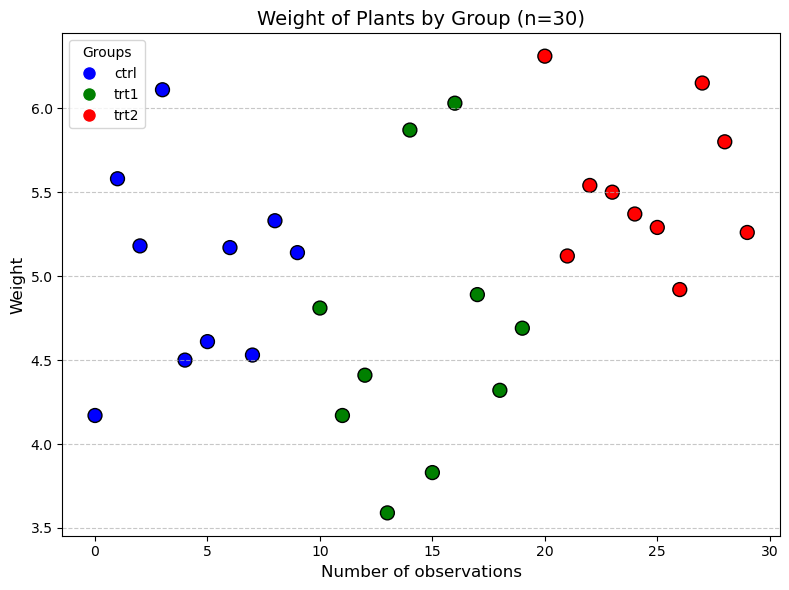

In [7]:
# Colors for each group
colors = {"ctrl": "blue", "trt1": "green", "trt2": "red"}

# Map colors to points based on the group
group_colors = plant_growth_data["group"].map(colors)

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(
    range(len(plant_growth_data)),  # Number of observations (n =30)
    plant_growth_data["weight"],    # (weight)
    c=group_colors,                 # Colors of the dots
    edgecolor="black",              # Color for the edge
    s=100,                          # Size of the dots
    
)

# Labels and title
plt.title("Weight of Plants by Group (n=30)", fontsize=14)
plt.xlabel("Number of observations", fontsize=12)
plt.ylabel("Weight", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Create a legend to distinguish colors
plt.legend(
    handles=[plt.Line2D([0], [0], marker="o", color="w", markerfacecolor=c, markersize=10, label=grp)
             for grp, c in colors.items()],
    title="Groups",
    loc="upper left"
)

# Show graph
plt.tight_layout()
plt.show()

A few key observations can be made based on this graph:
- **Group differences**: 
As mentioned before, the control group (coloured in blue) appears to have weights centered around 5.0.  
The treatment 1 group (green) shows more variability and low values below 5.0.  
The treatment 2 group (orange) has the higher values, almost all of them above 5.0.  
- **Trends**:
The control group seems very stable in terms of weight distribution.  
The treatment 1 may have induced weight loss.  
On the contrary, treatment 2 seems to have obtained the opposite result, having an increase in weight.  
- **Outliers**: Data points that significantly deviate from the rest of the dataset.  
There are no obvious outliers, just a couple of high and low values with respect to the average.

### 4.3 Perform ANOVA  
Now is the time to perform the ANOVA test to then compare both results.  
To carry out the Anova test I am going to use the functionalities of the Scipy library.

In [8]:

# Extract data for each group
group_ctrl = plant_growth_data[plant_growth_data["group"] == "ctrl"]["weight"]
group_trt1 = plant_growth_data[plant_growth_data["group"] == "trt1"]["weight"]
group_trt2 = plant_growth_data[plant_growth_data["group"] == "trt2"]["weight"]

# One way Anova
f_statistic, p_value = stats.f_oneway(group_ctrl,group_trt1,group_trt2)

# Significance level
alpha = 0.05

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 4.846087862380136
P-value: 0.0159099583256229


𝑝-worth = 0.0159 
p-value =0.0075 < α , so the null hypothesis is rejected.  
The result is the same than using the t-test ;by rejecting the null hypothesis in favor of the alternative hypothesis ,this suggests that there is sufficient statistical evidence to conclude that there is a significant difference in the mean weights between the trt1 and trt2 groups.  

***
## References  
 
https://vincentarelbundock.github.io/Rdatasets/articles/data.html [1]  
https://vincentarelbundock.github.io/Rdatasets/doc/datasets/PlantGrowth.html  
https://github.com/vincentarelbundock/Rdatasets/tree/master  
https://www.investopedia.com/terms/t/t-test.asp  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#ttest-rel  
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html  
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html   

